### Interactions
$$Y_i = \beta_0 + \beta_1 x_{i} + \beta_2 1_{[\textrm{some{ }group{ }1}]}(k_i) + \beta_3 x_{i} \times \beta_3 1_{[\textrm{some{ }group{ }1}]}(k_{i}) + \epsilon_i$$

### Categorical
$$Y_i = \beta_0 + \beta_2 1_{[\textrm{some{ }group{ }2}]}(k_i) + \beta_2 1_{[\textrm{some{ }group{ }3}]}(k_i) + \cdots + \beta_K 1_{[\textrm{some{ }group{ }K}]}(k_i)  + \epsilon_i$$



In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example dataset
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5],
    'X2': [10, 20, 30, 40, 50],
    'X3': [5, 7, 9, 11, 13],
    'Y': [2, 3, 5, 7, 9]
})

# Define the formula with interaction terms
formula = 'Y ~ X1 + X2 + X3 + X1:X2 + X1:X3 + X2:X3'

# Fit the model
model = ols(formula, data=data).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     286.0
Date:                Thu, 14 Nov 2024   Prob (F-statistic):            0.00348
Time:                        20:45:52   Log-Likelihood:                 2.3515
No. Observations:                   5   AIC:                             1.297
Df Residuals:                       2   BIC:                            0.1252
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0794      0.053      1.502      0.2

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


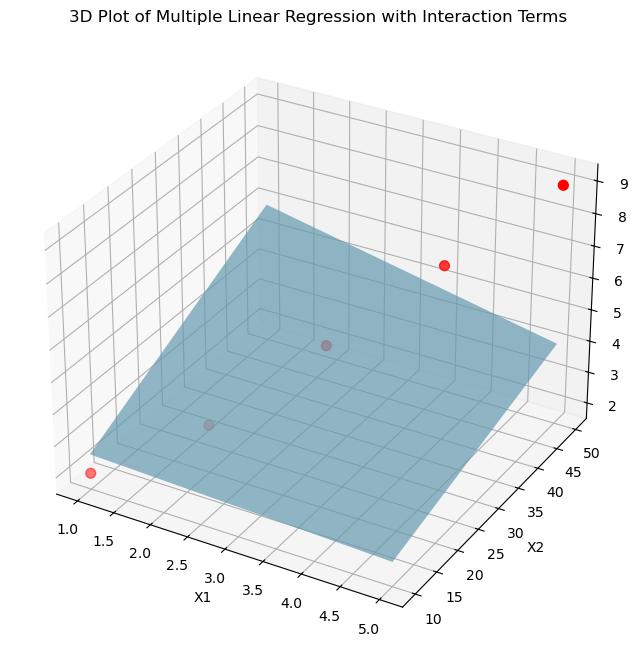

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5],
    'X2': [10, 20, 30, 40, 50],
    'X3': [5, 7, 9, 11, 13],
    'Y': [2, 3, 5, 7, 9]
})

# Fit the model with interaction terms
formula = 'Y ~ X1 + X2 + X3 + X1:X2 + X1:X3 + X2:X3'
model = ols(formula, data=data).fit()

# Create a grid of values for X1 and X2, keeping X3 constant
X1_range = np.linspace(data['X1'].min(), data['X1'].max(), 50)
X2_range = np.linspace(data['X2'].min(), data['X2'].max(), 50)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)
X3_const = 7  # Constant value for X3

# Predict Y values based on the model
Y_pred = model.predict(pd.DataFrame({
    'X1': X1_grid.ravel(),
    'X2': X2_grid.ravel(),
    'X3': X3_const
})).values.reshape(X1_grid.shape)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_grid, X2_grid, Y_pred, color='skyblue', alpha=0.7, rstride=100, cstride=100, edgecolor='none')
ax.scatter(data['X1'], data['X2'], data['Y'], color='red', s=50)  # Actual data points

# Labeling
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title('3D Plot of Multiple Linear Regression with Interaction Terms')
plt.show()
